# Passenger Volume Forcasting

## Imports

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


## Load Data

In [2]:
data = pd.read_csv('TAS_Airport_Data_2024_balanced.csv')
data

,FlightID,Airline,DepartureAirport,ArrivalAirport,OriginAirport,Gate,ScheduledTime,ScheduledArrivalTime,FlightDuration,BaggageHandlers,...,GateAvailability,GateType,AircraftTurnaroundTime,CheckInQueueTime,SecurityWaitTime,LoungeUsage,OnTimePerformance,BaggageClaimBelts,CustomsOfficers,ImmigrationOfficers
0,HY20240101_001D,HY,TAS,FRA,NaN,C18,2024-01-01 22:11:00,NaN,135,4,...,Available,International,57,7,27,No,Delayed,2,9,5
1,KE20240101_002D,KE,TAS,KUL,NaN,C3,2024-01-01 08:02:00,NaN,521,4,...,Available,International,57,7,27,No,Delayed,2,9,5
2,KE20240101_003D,KE,TAS,IST,NaN,C3,2024-01-01 20:33:00,NaN,291,4,...,Available,International,57,7,27,No,Delayed,2,9,5
3,HY20240101_004D,HY,TAS,SIN,NaN,C3,2024-01-01 20:03:00,NaN,462,2,...,Available,International,57,7,27,No,OnTime,2,9,5
4,HY20240101_005A,HY,NaN,NaN,FRA,C8,NaN,2024-01-01 11:50:00,192,4,...,Available,International,57,7,27,No,OnTime,2,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32935,TK20241231_086A,TK,NaN,NaN,DXB,B1,NaN,2024-12-31 16:50:00,119,6,...,Available,International,57,7,27,No,OnTime,2,9,5
32936,HY20241231_087A,HY,NaN,NaN,DXB,B16,NaN,2024-12-31 22:10:00,591,2,...,Available,International,57,7,27,No,Delayed,2,9,5
32937,HY20241231_088A,HY,NaN,NaN,LHR,C8,NaN,2024-12-31 19:04:00,103,4,...,Available,International,57,7,27,No,Delayed,2,9,5
32938,TK20241231_089A,TK,NaN,NaN,DEL,B20,NaN,2025-01-01 06:42:00,596,4,...,Available,International,57,7,27,No,OnTime,2,9,5


In [3]:
target = "Passengers"

# Drop missing target
data = data.dropna(subset=[target])

# Drop irrelevant columns
data = data.drop(columns=["FlightID", "DepartureAirport", "ArrivalAirport", "ScheduledTime", "ScheduledArrivalTime", 
                      "ReasonForDelay", "OnTimePerformance"])  




## Fill missing values and Encode cat_data

In [4]:
categorical_cols = data.select_dtypes(include="object").columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

## Feature matrix and target

In [5]:
X = data.drop(columns=[target])
y = data[target]

## Split data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature scaling

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model training

In [8]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [9]:
y_pred = model.predict(X_test_scaled)

## Evaluation

In [10]:
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")


R² Score: 0.72
MAE: 21.74
RMSE: 26.10


In [14]:
import joblib

joblib.dump(model, "passenger_volume.joblib")

['passenger_volume.joblib']

## Visualisation 

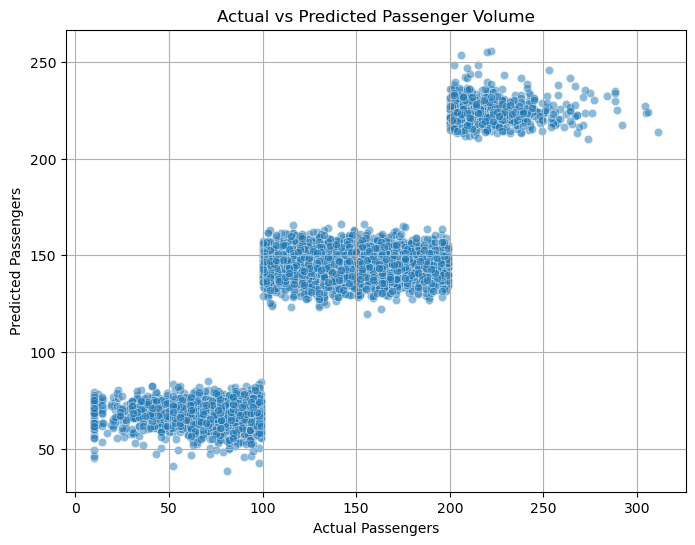

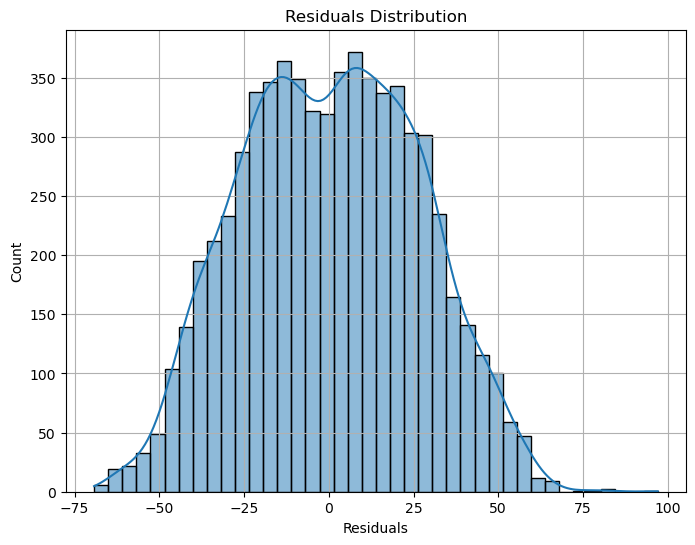

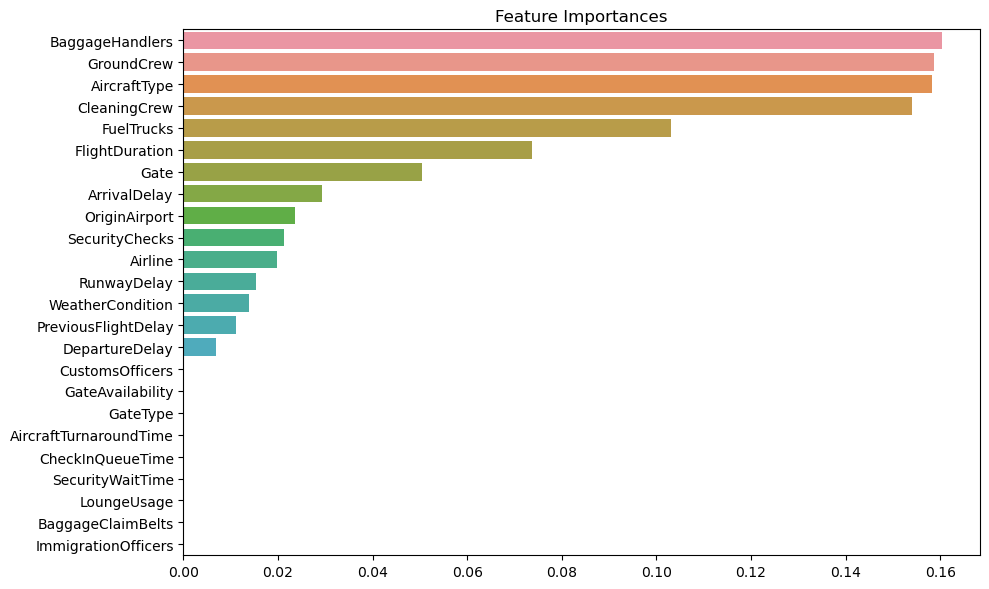

In [15]:
# 1. Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Passengers")
plt.ylabel("Predicted Passengers")
plt.title("Actual vs Predicted Passenger Volume")
plt.grid(True)
plt.savefig("passenger_volume_actual_vs_predicted.png")
plt.show()

# 2. Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=40, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.grid(True)
plt.savefig("passenger_volume_residuals.png")
plt.show()

# 3. Feature Importance
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title("Feature Importances")
plt.tight_layout()
plt.savefig("passenger_volume_feature_importance.png")
plt.show()
